In [1]:
import os

import torch
import deeplake
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader

In [2]:
data_dir = os.path.join("..", "data", "gleason-grading")
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

In [3]:
train_ds = deeplake.open(train_dir)
test_ds = deeplake.open(test_dir)

In [4]:
print("len train: ", len(train_ds))
print("len test: ", len(test_ds))

len train:  899331
len test:  373726


In [5]:
row = train_ds[0]

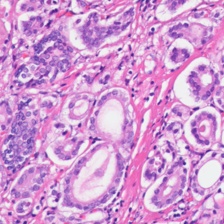

In [6]:
pil_img = Image.fromarray(row["image"])

pil_img

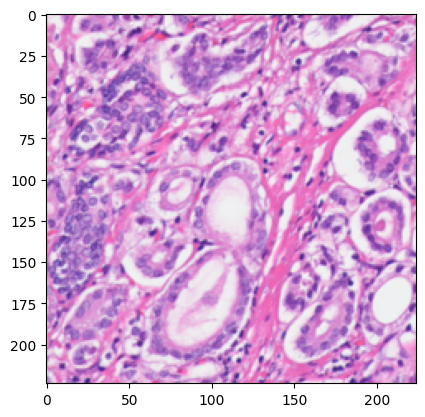

In [7]:
plt.imshow(transforms.ToTensor()(pil_img).permute(1,2,0).numpy())

plt.show()

In [8]:
print("label: ", row["label"])
print("file index: ", row["file_key"])

label:  2
file index:  0


In [9]:
def transform_fn(row):
    img_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])

    img = img_transform(row["image"])
    label = torch.tensor(row["label"])
    file_key = torch.tensor(row["file_key"])

    return img, label, file_key

train_loader = DataLoader(
    train_ds.pytorch(transform=transform_fn),
    batch_size=8,
    shuffle=True
    )

In [10]:
for i, (img, label, file_key) in tqdm(enumerate(train_loader)):
    break

0it [00:00, ?it/s]

0it [00:00, ?it/s]


In [11]:
img.shape

torch.Size([8, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3354341..2.3959913].


label:  tensor(1, dtype=torch.int32)
file key:  tensor(882356, dtype=torch.int32)



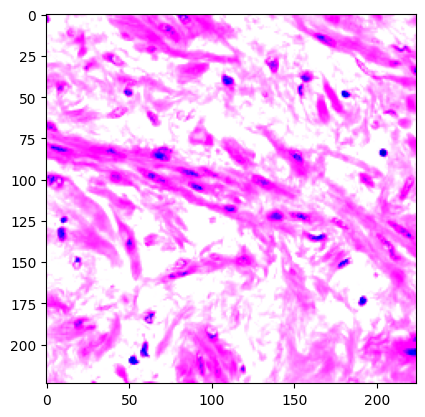

In [12]:
idx = 1

print("label: ", label[idx])
print("file key: ", file_key[idx])
print()

plt.imshow(img[idx].permute(1,2,0).numpy())
plt.show()